The aim is to train a deep learning model that looks at an image of outdoor scenery and predicts the weather condition shown in it.

In [ ]:
import tensorflow as tf
print(tf.__version__)
import keras
print(keras.__version__)



2.18.0
3.8.0


In [ ]:
import torch
torch.cuda.is_available()


True

In [ ]:
from google.colab import drive



In [ ]:
import zipfile

# Replace with the correct path
zip_file_path = '/content/drive/MyDrive/Deep learning/weather dataset.zip'
extract_path = '/content/drive/MyDrive/DL dataset'

with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("Extraction complete!")


Extraction complete!


**1) PREPARING LABELS (FEATURES : RAIN, CLOUDY, SHINE, SUNRISE )**

In [ ]:
import os
import re
import numpy as np
from sklearn.model_selection import train_test_split

#path to dataset conatinaing img
dataset_path = '/content/drive/MyDrive/DL dataset/dataset2'

#list all files
all_files = os.listdir(dataset_path)
print(all_files)
#initialize lists for img paths and labels
img_paths = []
labels = []

#map class labels to numeric values using the following dictionary
class_mapping = {'cloudy': 0, 'rain': 1, 'shine': 2, 'sunrise': 3}

#iterate through all files and extract the class labels from FILENAME
for file_name in all_files:
    if file_name.endswith('.jpg'):
        label = re.match(r"[a-zA-Z]+", file_name).group()
        if label in class_mapping:
            img_paths.append(os.path.join(dataset_path, file_name))
            labels.append(class_mapping[label])

labels = np.array(labels)

['cloudy1.jpg', 'cloudy10.jpg', 'cloudy100.jpg', 'cloudy101.jpg', 'cloudy102.jpg', 'cloudy103.jpg', 'cloudy104.jpg', 'cloudy105.jpg', 'cloudy106.jpg', 'cloudy107.jpg', 'cloudy108.jpg', 'cloudy109.jpg', 'cloudy11.jpg', 'cloudy110.jpg', 'cloudy111.jpg', 'cloudy112.jpg', 'cloudy113.jpg', 'cloudy114.jpg', 'cloudy115.jpg', 'cloudy116.jpg', 'cloudy117.jpg', 'cloudy118.jpg', 'cloudy119.jpg', 'cloudy12.jpg', 'cloudy120.jpg', 'cloudy121.jpg', 'cloudy122.jpg', 'cloudy123.jpg', 'cloudy124.jpg', 'cloudy125.jpg', 'cloudy126.jpg', 'cloudy127.jpg', 'cloudy128.jpg', 'cloudy129.jpg', 'cloudy13.jpg', 'cloudy130.jpg', 'cloudy131.jpg', 'cloudy132.jpg', 'cloudy133.jpg', 'cloudy134.jpg', 'cloudy135.jpg', 'cloudy136.jpg', 'cloudy137.jpg', 'cloudy138.jpg', 'cloudy139.jpg', 'cloudy14.jpg', 'cloudy140.jpg', 'cloudy141.jpg', 'cloudy142.jpg', 'cloudy143.jpg', 'cloudy144.jpg', 'cloudy145.jpg', 'cloudy146.jpg', 'cloudy147.jpg', 'cloudy148.jpg', 'cloudy149.jpg', 'cloudy15.jpg', 'cloudy150.jpg', 'cloudy151.jpg', 'clo

In [ ]:
print(img_paths)
print (labels)

['/content/drive/MyDrive/DL dataset/dataset2/cloudy1.jpg', '/content/drive/MyDrive/DL dataset/dataset2/cloudy10.jpg', '/content/drive/MyDrive/DL dataset/dataset2/cloudy100.jpg', '/content/drive/MyDrive/DL dataset/dataset2/cloudy101.jpg', '/content/drive/MyDrive/DL dataset/dataset2/cloudy102.jpg', '/content/drive/MyDrive/DL dataset/dataset2/cloudy103.jpg', '/content/drive/MyDrive/DL dataset/dataset2/cloudy104.jpg', '/content/drive/MyDrive/DL dataset/dataset2/cloudy105.jpg', '/content/drive/MyDrive/DL dataset/dataset2/cloudy106.jpg', '/content/drive/MyDrive/DL dataset/dataset2/cloudy107.jpg', '/content/drive/MyDrive/DL dataset/dataset2/cloudy108.jpg', '/content/drive/MyDrive/DL dataset/dataset2/cloudy109.jpg', '/content/drive/MyDrive/DL dataset/dataset2/cloudy11.jpg', '/content/drive/MyDrive/DL dataset/dataset2/cloudy110.jpg', '/content/drive/MyDrive/DL dataset/dataset2/cloudy111.jpg', '/content/drive/MyDrive/DL dataset/dataset2/cloudy112.jpg', '/content/drive/MyDrive/DL dataset/dataset2

In [ ]:
from sklearn.model_selection import train_test_split

# Split the data into training and validation sets (80% train, 20% validation)
X_train, X_val, y_train, y_val = train_test_split(img_paths, labels, test_size=0.2, random_state=42)

# Split the training set further into training and test sets (75% train, 25% test)
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.25, random_state=42)


In [ ]:
import tensorflow as tf

# Set GPU memory growth to avoid TensorFlow taking all the GPU memory at once
physical_devices = tf.config.list_physical_devices('GPU')
if physical_devices:
    tf.config.experimental.set_memory_growth(physical_devices[0], True)

print("Using GPU: ", physical_devices)


Using GPU:  [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


**2) LOAD AND PREPROCESS DATA**

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.applications.vgg16 import preprocess_input

In [ ]:
#function to load and preprocess images
def load_and_preprocess_images(img_paths, traget_size =(224,224)):
  img_list = []

  for img_path in img_paths:
    #load the img
    img = image.load_img(img_path, target_size=(224,224))

    #convert img to a NUMPY array
    img_array = image.img_to_array(img)

    #normalize the image (scaling pixel values between 0 and 1)
    img_array = img_array / 255.0

    img_list.append(img_array)

  return np.array(img_list) #(number of img, heightm width, channels)

#preprocess training, validation and tests img
X_train_processed = load_and_preprocess_images(X_train)
X_val_processed = load_and_preprocess_images(X_val)
X_test_processed = load_and_preprocess_images(X_test)

# Convert labels to categorical (one-hot encoding) for multi-class classification
y_train_processed = to_categorical(y_train, num_classes=len(class_mapping))
y_val_processed = to_categorical(y_val, num_classes=len(class_mapping))
y_test_processed = to_categorical(y_test, num_classes=len(class_mapping))

# Check the shape of the processed images
print(f"Training images shape: {X_train_processed.shape}")
print(f"Validation images shape: {X_val_processed.shape}")
print(f"Test images shape: {X_test_processed.shape}")


Training images shape: (672, 224, 224, 3)
Validation images shape: (225, 224, 224, 3)
Test images shape: (225, 224, 224, 3)


In [ ]:
print(y_train_processed)



[[1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]
 ...
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]]


**3) MODEL BUILDING (CNN MODEL)**

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

model = Sequential()

#add conv. layer
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))  # input shape (height, width, channels)
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Dense(128, activation='relu'))

#flatten the feature maps to prepare fully connected layes
model.add(Flatten())

#add fully connected layers
model.add(Dropout(0.5))
model.add(Dense(len(class_mapping), activation='softmax'))

#compile the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])



/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
print(X_train_processed.shape)  # Should output (num_samples, 224, 224, 3)
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


(672, 224, 224, 3)


In [ ]:
print(type(X_train_processed), X_train_processed.dtype)  # Should be numpy array and float32
print(y_train_processed.shape)  # Ensure this matches the number of classes and the number of samples



<class 'numpy.ndarray'> float32
(672, 4)


In [ ]:
# Train the model
history = model.fit(X_train_processed, y_train_processed, epochs=10, batch_size=18, validation_data=(X_val_processed, y_val_processed))


Epoch 1/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 22s 406ms/step - accuracy: 0.4579 - loss: 1.0877 - val_accuracy: 0.7644 - val_loss: 0.6733
Epoch 2/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 22s 38ms/step - accuracy: 0.8051 - loss: 0.5331 - val_accuracy: 0.8089 - val_loss: 0.5498
Epoch 3/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.8830 - loss: 0.4000 - val_accuracy: 0.7556 - val_loss: 0.6342
Epoch 4/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.8533 - loss: 0.3768 - val_accuracy: 0.9022 - val_loss: 0.3466
Epoch 5/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.9168 - loss: 0.2005 - val_accuracy: 0.8711 - val_loss: 0.3795
Epoch 6/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.9034 - loss: 0.2638 - val_accuracy: 0.8400 - val_loss: 0.4249
Epoch 7/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.9066 - loss: 0.2523 - val_accuracy: 0.8444 - val_loss: 0.4116
Epoch 8/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.9559 - loss: 0.1389 - val_accuracy: 0.8578 

**EVALUATION**


In [ ]:
# Evaluate on the validation set
val_loss, val_accuracy = model.evaluate(X_val_processed, y_val_processed)
print(f"Validation Loss: {val_loss}")
print(f"Validation Accuracy: {val_accuracy}")


8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 84ms/step - accuracy: 0.8439 - loss: 0.4914
Validation Loss: 0.5157156586647034
Validation Accuracy: 0.8399999737739563


In [ ]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test_processed, y_test_processed)

# Print the test results
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.8356 - loss: 0.4275
Test Loss: 0.36802300810813904
Test Accuracy: 0.8533333539962769


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

# Predict the class labels for validation data
y_pred = model.predict(X_val_processed)
y_pred_classes = np.argmax(y_pred, axis=1)

# Print confusion matrix
print(confusion_matrix(np.argmax(y_val_processed, axis=1), y_pred_classes))

# Print classification report
print(classification_report(np.argmax(y_val_processed, axis=1), y_pred_classes))


8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 87ms/step
[[57  0  4  0]
 [17 19  2  0]
 [ 8  3 43  0]
 [ 1  0  1 70]]
              precision    recall  f1-score   support

           0       0.69      0.93      0.79        61
           1       0.86      0.50      0.63        38
           2       0.86      0.80      0.83        54
           3       1.00      0.97      0.99        72

    accuracy                           0.84       225
   macro avg       0.85      0.80      0.81       225
weighted avg       0.86      0.84      0.84       225



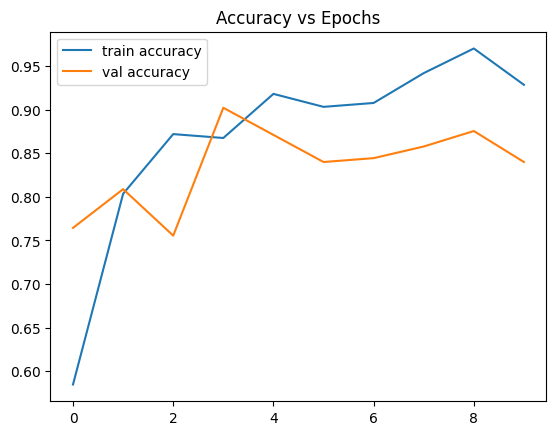

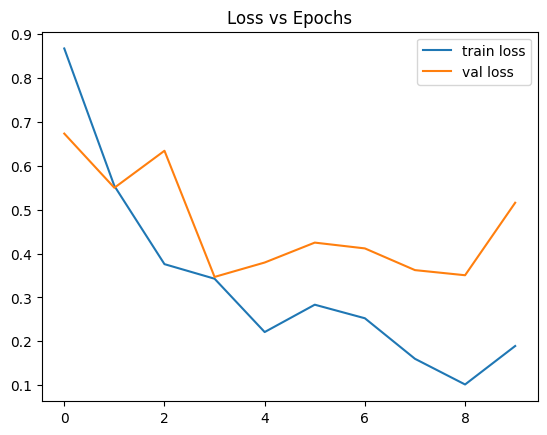

In [ ]:
import matplotlib.pyplot as plt

# Plot accuracy
plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.legend()
plt.title("Accuracy vs Epochs")
plt.show()

# Plot loss
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.title("Loss vs Epochs")
plt.show()


In [ ]:
model.save('/content/drive/MyDrive/Deep learning/MyModels/weathermodel.keras')  # Save as Keras format
